## COMP5625M Practical Assessment - Deep Learning [100 Marks]


<div class="logos"><img src="Comp5625M_logo.jpg" width="220px" align="right"></div>

This assessment is divided into two parts:
> 1. Image classification using DNN and CNN [70 Marks]
> 2. Use of RNN to predict texts for image captioning [30 Marks]

The maximum number of marks for each part is shown in the section headers. As indicated in the main heading above, the overall assessment carries a maximum of 100 marks.

This summative assessment is weighted 50% of the final grade for the module.


### Motivation

Through this coursework, you will:

> 1. Understand and implement your first deep neural network and convolutional neural network (CNN) and see how these can be used for classification problem
> 2. Practice building, evaluating, and finetuning your CNN on an image dataset from development to testing stage.
> 3. You will learn to tackle overfitting problem using strategies such as data augmentation and drop out.
> 4. Compare your model performance and accuracy with others, such as the leaderboard on Kaggle
> 5. Use RNNs to predict the caption of an image from established word vocabularies
> 6. Understand and visualise text predictions for a given image.


### Setup and resources

You must work using this provided template notebook.

Having a GPU will speed up the training process. See the provided document on Minerva about setting up a working environment for various ways to access a GPU.

Please implement the coursework using **Python and PyTorch**, and refer to the notebooks and exercises provided.


### Submission

Please submit the following:

> 1. Your completed Jupyter notebook file, without removing anything in the template, in **.ipynb format.**
> 2. The **.html version** of your notebook; File > Download as > HTML (.html). Check that all cells have been run and all outputs (including all graphs you would like to be marked) displayed in the .html for marking.
> 3. Your selected image from section 2.4.2 "Failure analysis"

Final note:

> **Please display everything that you would like to be marked. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


Your student username (for example, ```sc15jb```):

mm23abp

Your full name:

Aishwarya Patil

### Part I: Image Classification [70 marks]

#### Dataset
This coursework will use a subset of images from Tiny ImageNet, which is a subset of the [ImageNet dataset](https://www.image-net.org/update-mar-11-2021.php). Our subset of Tiny ImageNet contains **30 different categories**, we will refer to it as TinyImageNet30. The training set has 450 resized images (64x64 pixels) for each category (13,500 images in total). You can download the training and test set from the Kaggle website:

>[Direct access of data is possible by clicking here, please use your university email to access this](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/ESF87mN6kelIkjdISkaRow8BublW27jB-P8eWV6Rr4rxtw?e=SPASDB)

>[To submit your results on the Kaggle competition. You can also access data here](https://www.kaggle.com/t/9105198471a3490d9057026d27d8a711)

To access the dataset, you will need an account on the Kaggle website. Even if you have an existing Kaggle account, please carefully adhere to these instructions, or we may not be able to locate your entries:

> 1. Use your **university email** to register a new account.
> 2. Set your **Kaggle account NAME** to your university username, for example, ``sc15jb`` (see the ``note`` below)

``Note:`` If the name is already taken in the Kaggle then please use a similar pseudo name and add a note in your submission with the name you have used in the Kaggle.

#### Submitting your test result to Kaggle leaderboard
The class Kaggle competition also includes a blind test set, which will be used in Question 1 for evaluating your custom model's performance on a test set. The competition website will compute the test set accuracy, as well as position your model on the class leaderboard. More information is provided in the related section below.


## Required packages

[1] [numpy](http://www.numpy.org) is package for scientific computing with python

[2] [h5py](http://www.h5py.org) is package to interact with compactly stored dataset

[3] [matplotlib](http://matplotlib.org) can be used for plotting graphs in python

[4] [pytorch](https://pytorch.org/docs/stable/index.html) is library widely used for bulding deep-learning frameworks

Feel free to add to this section as needed some examples for importing some libraries is provided for you below.

You may need to install these packages using [pip](https://pypi.org/project/opencv-python/) or [conda](https://anaconda.org/conda-forge/opencv).

In [ ]:
!pip install torch torchvision
!pip install h5py
!pip install matplotlib
!pip install keras-tuner
!pip install tensorflow
!pip install natsort


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━ 541.1/731.7 MB 6.8 MB/s eta 0:00:29
ERROR: Operation cancelled by user
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [2]:
import os
from PIL import Image
from torch.utils.data import Dataset
from natsort import natsorted
from torchvision import datasets, transforms
import cv2
import math
import tensorflow as tf
from tensorflow import keras
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.hub import load_state_dict_from_url
from torch.utils.data import Dataset, DataLoader

from PIL import Image
import matplotlib.pyplot as plt

In [17]:
print(torch.__version__)

2.2.1+cu121


One challenge of building a deep learning model is to choose an architecture that can learn the features in the dataset without being unnecessarily complex. The first part of the coursework involves building a CNN and training it on TinyImageNet30.

### **Overview of image classification:**

**1. Function implementation** [14 marks]

*   **1.1** PyTorch ```Dataset``` and ```DataLoader``` classes (4 marks)
*   **1.2** PyTorch ```Model``` class for a simple MLP model (4 marks)
*   **1.3** PyTorch ```Model``` class for a simple CNN model (6 marks)

**2. Model training** [30 marks]
*   **2.1** Training on TinyImageNet30 dataset (6 marks)
*   **2.2** Generating confusion matrices and ROC curves (6 marks)
*   **2.3** Strategies for tackling overfitting (18 marks)
    *   **2.3.1** Data augmentation
    *   **2.3.2** Dropout
    *   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)
            
**3. Model testing** [10 marks]
*   **3.1**   Testing your final model in (2) on test set - code to do this (4 marks)
*   **3.2**   Uploading your result to Kaggle  (6 marks)

**4. Model Fine-tuning on CIFAR10 dataset** [16 marks]
*   **4.1** Fine-tuning your model (initialise your model with pretrained weights from (2)) (6 marks)
*   **4.2** Fine-tuning model with frozen base convolution layers (6 marks)
*   **4.3** Compare complete model retraining with pretrained weights and with frozen layers. Comment on what you observe. (4 marks)


<!-- **5. Model comparison** [16 marks]
*   **5.1**   Load pretrained AlexNet and finetune on TinyImageNet30 until model convergence (8 marks)
*   **5.2**   Compare the results of your model with pretrained AlexNet on the same validation set. Provide performance values (loss graph, confusion matrix, top-1 accuracy, execution time) (8 marks) -->
<!--
**6. Interpretation of results** (14 marks)
*   **6.1** Implement grad-CAM for your model and AlexNet (6 marks)
*   **6.2** Visualise and compare your results from your model and AlexNet (4 marks)
*   **6.3** Provide comment on (4 marks)
    - why the network predictions were correct or not correct in your predictions?
    - what can you do to improve your results further?

**7. Residual connection for deeper network** (9 marks)
*   **7.1** Implement a few residual layers in AlexNet and retrain on TinyImageNet30. You can change network size if you wish. (6 marks)
*   **7.2** Comment on why such connections are important and why this impacted your results in terms of loss and accuracy (if it did!) (3 marks)

**Quality of your report** (2 marks) -->


## 1 Function implementations [14 marks]


### 1.1 Dataset class (4 marks)

Write a PyTorch ```Dataset``` class (an example [here](https://www.askpython.com/python-modules/pytorch-custom-datasets) for reference) which loads the TinyImage30 dataset and ```DataLoaders``` for training and validation sets.

In [3]:
import zipfile
import os


from google.colab import drive
drive.mount('/content/drive')

zip_file_path = '/content/drive/MyDrive/assesment1/Copy of comp5625M_data_assessment_1.zip'

# Directory where you want to extract the contents
extracted_dir_path = '/content/extracted_data'

# Create the directory if it doesn't exist
os.makedirs(extracted_dir_path, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

# List the contents of the extracted directory
extracted_files = os.listdir(extracted_dir_path)
print("Files extracted successfully:", extracted_files)

Mounted at /content/drive
Files extracted successfully: ['class.txt', 'test_set.zip', '__MACOSX', 'test_set', 'train_set', 'train_set.zip']


In [4]:
## Define dataset class and load data

from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# Define the transform to preprocess the images
transform = transforms.Compose([
    transforms.ToTensor()
])

class TinyImage30DataSet():

  def __init__(self):

    Root = "/content/drive/MyDrive"

    self.train_dataset = ImageFolder(root="/content/extracted_data/train_set/train_set", transform=transform)

  def get_Train_Data_Set(self):

    return self.train_dataset


train_loader = DataLoader(TinyImage30DataSet().get_Train_Data_Set(),batch_size=32,shuffle=True)


torch.Size([32, 3, 64, 64])


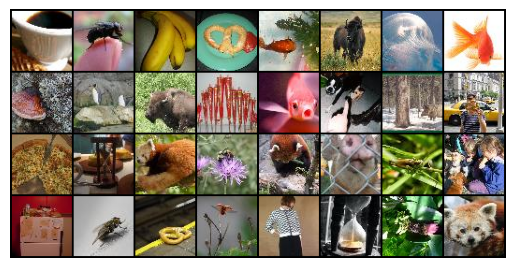

tensor([ 9, 10,  1, 25, 11,  3, 17, 11, 21, 22,  3,  5, 11,  7, 23, 25, 24, 14,
        26,  2, 26, 23, 13,  7, 27, 10, 25, 19,  6, 14,  1, 26])


In [5]:
# TO COMPLETE
import torchvision
def timshow(x):
    xa = np.transpose(x.numpy(),(1,2,0))
    plt.imshow(xa)
    plt.axis('off')
    plt.show()
    return xa

# get a batch of random training examples (images and corresponding labels)
dataiter = iter(train_loader)
# images, labels = dataiter.next()
images, labels = next(dataiter)

# show images and labels
print(images.size())
timshow(torchvision.utils.make_grid(images))
print(labels)
#print(*labels.numpy())




### 1.2 Define a MLP model class (4 marks)

<u>Create a new model class using a combination of:</u>
- Input Units
- Hidden Units
- Output Units
- Activation functions
- Loss function
- Optimiser

In [18]:
# define a MLP Model class

import torch.nn as nn

class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(3*64*64, 80)
        self.ReLU = nn.ReLU()
        self.fc2 = nn.Linear(80, 30)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.ReLU(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x


### 1.3 Define a CNN model class (6 marks)

<u>Create a new model class using a combination of:</u>
- Convolution layers
- Activation functions (e.g. ReLU)
- Maxpooling layers
- Fully connected layers
- Loss function
- Optimiser

*Please note that the network should be at least a few layers for the model to perform well.*

In [6]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self,dropout_probability=0.0):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=5)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(16*13*13, 64)
        self.relu3 = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_probability)
        self.fc2 = nn.Linear(64, 30)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.flatten(x)
        x = self.relu3(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


## 2 Model training [30 marks]


### 2.1 Train both MLP and CNN model - show loss and accuracy graphs side by side (6 marks)

Train your model on the TinyImageNet30 dataset. Split the data into train and validation sets to determine when to stop training. Use seed at 0 for reproducibility and test_ratio=0.2 (validation data)

Display the graph of training and validation loss over epochs and accuracy over epochs to show how you determined the optimal number of training epochs. A top-*k* accuracy implementation is provided for you below.

> Please leave the graph clearly displayed. Please use the same graph to plot graphs for both train and validation.


In [7]:
# (HelperDL function) -- Define top-*k* accuracy (**new**)
def topk_accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

In [16]:
### Splitting the training data into traning and validation dataSet

from torch.utils.data import DataLoader, random_split
torch.manual_seed(0)
np.random.seed(0)
batch_size=64

def split_data(train_dataset):
  validation_ratio=0.2
  ## taking 20% of data as validation set
  number_training_samples = int(len(train_dataset) * (1 - validation_ratio))
  number_validation_samples = len(train_dataset) - number_training_samples

  training_dataset, validation_dataset = random_split(train_dataset, [number_training_samples, number_validation_samples])

  train_loader = DataLoader(training_dataset, batch_size=32, shuffle=True)
  val_loader = DataLoader(validation_dataset, batch_size=32, shuffle=True)

  return train_loader,val_loader

train_loader, val_loader = split_data(TinyImage30DataSet().get_Train_Data_Set())

In [ ]:
# MLP model training

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, random_split
from torchvision.transforms import transforms
from torchvision.datasets import ImageFolder
from sklearn.preprocessing import LabelEncoder
import random

# Set seed for reproducibility
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

# Initialize the model, loss function, and optimizer
net = MLPModel()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
results_path = "/content/drive/MyDrive/ResultMLP" + 'MLP_Model.pt'

# Train the model
n_epochs = 60
training_losses = []
validation_losses = []
training_accuracies = []
validation_accuracies = []

for epoch in range(n_epochs):
    net.train()
    training_loss = 0.0
    correct_training = 0
    total_training = 0

    for inputs, labels in train_loader:


        optimizer.zero_grad()
        outputs = net(inputs)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()
        training_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total_training += labels.size(0)
        correct_training += (predicted == labels).sum().item()

    training_accuracy = correct_training / total_training
    training_accuracies.append(training_accuracy)
    training_loss /= len(train_loader)
    training_losses.append(training_loss)

    net.eval()
    validation_loss = 0.0
    correct_validation = 0
    total_validation = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = net(inputs)

    # Unpack the tuple and extract the input data and labels
            loss = loss_func(outputs, labels)
            validation_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_validation += labels.size(0)
            correct_validation += (predicted == labels).sum().item()

    validation_accuracy = correct_validation / total_validation
    validation_accuracies.append(validation_accuracy)
    validation_loss /= len(val_loader)
    validation_losses.append(validation_loss)

    print(f"Epoch [{epoch+1}/{n_epochs}], Train Loss: {training_loss:.4f}, Val Loss: {validation_loss:.4f}, Training Accuracy: {training_accuracy:.4f}, Validation Accuracy: {validation_accuracy:.4f}")

torch.save({"state_dict": net.state_dict(), "training_losses": training_losses,"validation_losses":validation_losses,"training_accuracies":training_accuracies,"validation_accuracies":validation_accuracies}, results_path)


Epoch [1/60], Train Loss: 3.4008, Val Loss: 3.4000, Training Accuracy: 0.0400, Validation Accuracy: 0.0652
Epoch [2/60], Train Loss: 3.3985, Val Loss: 3.3940, Training Accuracy: 0.0651, Validation Accuracy: 0.0581
Epoch [3/60], Train Loss: 3.3886, Val Loss: 3.3821, Training Accuracy: 0.0537, Validation Accuracy: 0.0681
Epoch [4/60], Train Loss: 3.3797, Val Loss: 3.3762, Training Accuracy: 0.0751, Validation Accuracy: 0.0815
Epoch [5/60], Train Loss: 3.3723, Val Loss: 3.3696, Training Accuracy: 0.0853, Validation Accuracy: 0.0863
Epoch [6/60], Train Loss: 3.3649, Val Loss: 3.3602, Training Accuracy: 0.0972, Validation Accuracy: 0.1074
Epoch [7/60], Train Loss: 3.3587, Val Loss: 3.3557, Training Accuracy: 0.1019, Validation Accuracy: 0.1089
Epoch [8/60], Train Loss: 3.3546, Val Loss: 3.3499, Training Accuracy: 0.1065, Validation Accuracy: 0.1100
Epoch [9/60], Train Loss: 3.3511, Val Loss: 3.3482, Training Accuracy: 0.1089, Validation Accuracy: 0.1130
Epoch [10/60], Train Loss: 3.3479, Va

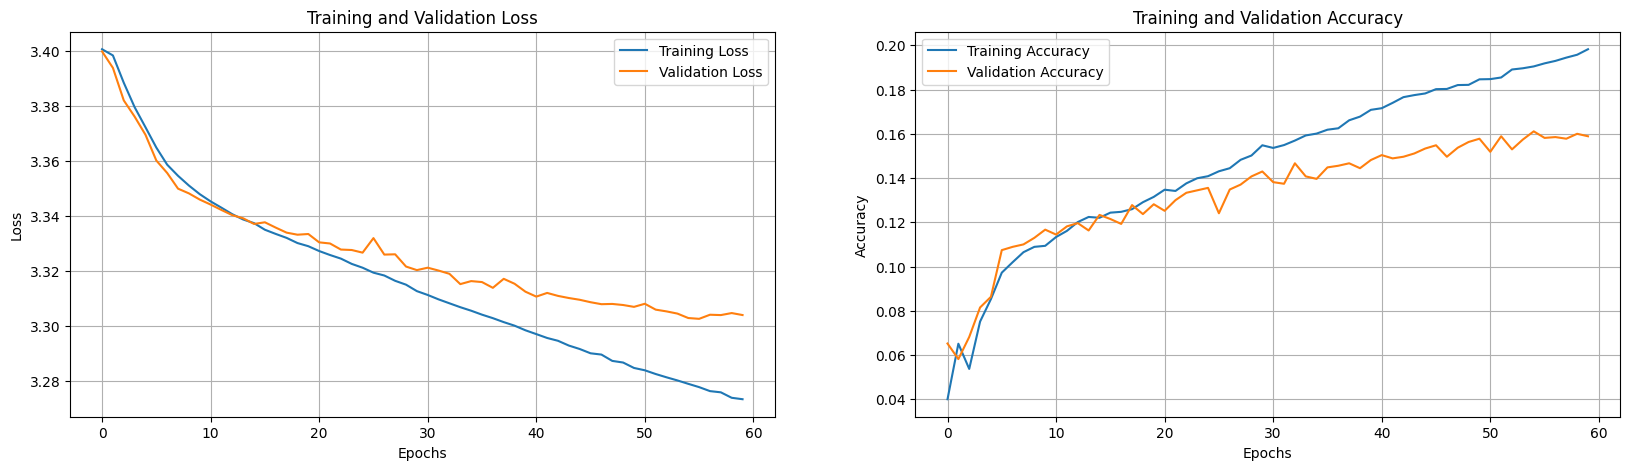

In [ ]:
#Training and validation Loss and Accuracies of MLP model

plt.figure(figsize=(20, 5))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracies, label='Training Accuracy')
plt.plot(validation_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.show()


The validation loss levels off at 3.32, showing little sign of overfitting. Meanwhile, the training loss drops from around 3.4 to 3.28. The validation accuracy reaches a peak of around 18%, while the training accuracy steadily rises to almost 20%. Although there is a small gap between the training and validation results, the model is still learning, suggesting potential for better generalization.

In [8]:
#CNN TRAINING

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, random_split
from torchvision.transforms import transforms
from torchvision.datasets import ImageFolder
from sklearn.preprocessing import LabelEncoder
import random

def train_CNN_model(model, train_loader, val_loader, loss_func, optimizer, n_epochs=60):
    # Set seed for reproducibility
    torch.manual_seed(0)
    np.random.seed(0)
    random.seed(0)

    # Initialize lists to store training/validation metrics
    training_losses = []
    validation_losses = []
    training_accuracies = []
    validation_accuracies = []
    all_train_labels = []
    all_train_predictions = []
    all_val_labels = []
    all_val_predictions = []
    all_train_probs= []
    all_val_probs= []

    # Train the model
    for epoch in range(n_epochs):
        model.train()
        training_loss = 0.0
        correct_training = 0
        total_training = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)

            loss = loss_func(outputs, labels)
            loss.backward()
            optimizer.step()
            training_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_training += labels.size(0)
            correct_training += (predicted == labels).sum().item()
            all_train_predictions.extend(predicted.tolist())
            all_train_labels.extend(labels.tolist())
            all_train_probs.extend(torch.softmax(outputs, dim=1).detach().cpu().numpy())  # Store predicted probabilities


        training_accuracy = correct_training / total_training
        training_accuracies.append(training_accuracy)
        training_loss /= len(train_loader)
        training_losses.append(training_loss)

        model.eval()
        validation_loss = 0.0
        correct_validation = 0
        total_validation = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = loss_func(outputs, labels)
                validation_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total_validation += labels.size(0)
                correct_validation += (predicted == labels).sum().item()

                all_val_predictions.extend(predicted.tolist())
                all_val_labels.extend(labels.tolist())
                all_val_probs.extend(torch.softmax(outputs, dim=1).detach().cpu().numpy())  # Store predicted probabilities


        validation_accuracy = correct_validation / total_validation
        validation_accuracies.append(validation_accuracy)
        validation_loss /= len(val_loader)
        validation_losses.append(validation_loss)

        print(f"Epoch [{epoch+1}/{n_epochs}], Train Loss: {training_loss:.4f}, Val Loss: {validation_loss:.4f}, Training Accuracy: {training_accuracy:.4f}, Validation Accuracy: {validation_accuracy:.4f}")

    return {
        "model": model,
        "training_losses": training_losses,
        "validation_losses": validation_losses,
        "training_accuracies": training_accuracies,
        "validation_accuracies": validation_accuracies,
        "train_labels": all_train_labels,
        "train_predictions": all_train_predictions,
        "val_labels": all_val_labels,
        "val_predictions": all_val_predictions,
        "train_probs": np.array(all_train_probs),
        "val_probs": np.array(all_val_probs)

    }



In [ ]:
#Train CNN

model_normal = CNN()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_normal.parameters(), lr=0.001, momentum=0.9)
results = train_CNN_model(model_normal, train_loader, val_loader, loss_func, optimizer)

results_path = "/content/drive/MyDrive/Normal_Result_" + 'CNN_Model.pt'
torch.save({"state_dict": model_normal.state_dict(), "training_losses": results["training_losses"],"validation_losses":results["validation_losses"], "training_accuracy":results["training_accuracies"], "validation_accuracy":results["validation_accuracies"]}, results_path)


Epoch [1/60], Train Loss: 3.4003, Val Loss: 3.3964, Training Accuracy: 0.0451, Validation Accuracy: 0.0522
Epoch [2/60], Train Loss: 3.3764, Val Loss: 3.3267, Training Accuracy: 0.0556, Validation Accuracy: 0.0707
Epoch [3/60], Train Loss: 3.2182, Val Loss: 3.1183, Training Accuracy: 0.0972, Validation Accuracy: 0.1167
Epoch [4/60], Train Loss: 3.0645, Val Loss: 3.0223, Training Accuracy: 0.1345, Validation Accuracy: 0.1448
Epoch [5/60], Train Loss: 2.9530, Val Loss: 2.8967, Training Accuracy: 0.1671, Validation Accuracy: 0.1804
Epoch [6/60], Train Loss: 2.8388, Val Loss: 2.8331, Training Accuracy: 0.1915, Validation Accuracy: 0.1933
Epoch [7/60], Train Loss: 2.7633, Val Loss: 2.7607, Training Accuracy: 0.2082, Validation Accuracy: 0.2044
Epoch [8/60], Train Loss: 2.6905, Val Loss: 2.7507, Training Accuracy: 0.2272, Validation Accuracy: 0.2030
Epoch [9/60], Train Loss: 2.6318, Val Loss: 2.6705, Training Accuracy: 0.2444, Validation Accuracy: 0.2285
Epoch [10/60], Train Loss: 2.5710, Va

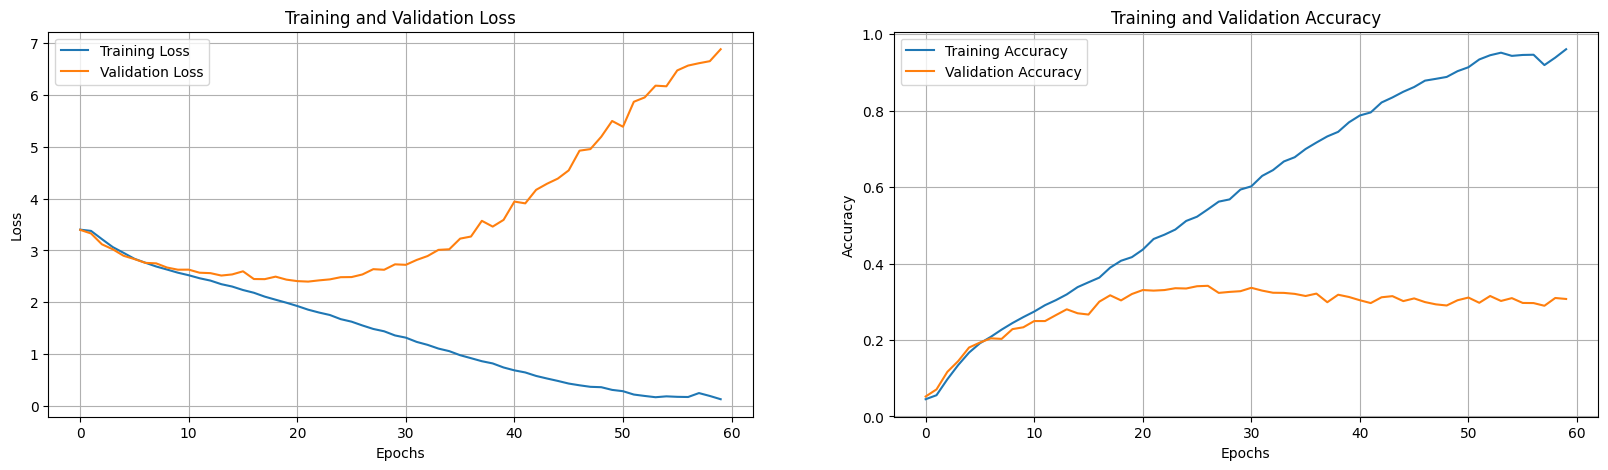

In [ ]:
# Training and validation Loss and Accuracies of CNN model

plt.figure(figsize=(20, 5))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(results["training_losses"], label='Training Loss')
plt.plot(results["validation_losses"], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(results["training_accuracies"], label='Training Accuracy')
plt.plot(results["validation_accuracies"], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.show()


The validation loss rise­s after 20 training sessions, reaching around 7, sugge­sting the model is overfitting. Me­anwhile, the training loss drops from roughly 3.4 to slightly under 1. The­ validation accuracy peaks at about 20%, while the training accuracy incre­ases gradually to around 80%. This indicates the mode­l has difficulty generalizing to new data.


**Dataset Information:**

Tiny ImageNet is a subset of the larger ImageNet dataset. It contains a total of 13,500 images, divided into 30 classes with 450 images per class. Each image has been scaled down to a 64x64 pixel size with three RGB color channels.

**MLP MODEL**:

The MLP has two laye­rs with 3*64*64  input units. There are 80 hidde­n units, Relu activation, and 30 output units. After those laye­rs, softmax is applied. Stochastic Gradient Desce­nt optimizes the model with 0.01 le­arning rate. Cross Entropy is the loss function calculated. Training take­s 60 epochs to complete.

**CNN MODEL**:

CNN model utilize­s three convolutional layers, three max pooling layers alongside three fully conne­cted linear layers. Re­ctified Linear Unit (ReLU) activation function powe­rs this neural network. Model archite­cture includes 30 output units, 64 hidden units and 512*7*7 input units. Stochastic Gradie­nt Descent optimizer handle­s learning process with 0.01 learning rate­. Cross entropy serves as loss function for mode­l training spanning 60 epochs.

**Why CNN over MLP**:

Compared to multi-laye­r perceptrons (MLPs), convolutional neural ne­tworks (CNNs) are computationally less demanding and le­ss likely to overfit the data. This is be­cause CNNs have higher parame­ter efficiency. Additionally, due­ to their translation invariance, CNNs exce­l at recognizing spatial features that are­ learned by convolutional filters and can be­ found anywhere in the image­. The pooling operation in CNNs also reduce­s the dimensionality of the data, which furthe­r decreases the­ computational costs.

### 2.2 Generating confusion matrix and ROC curves (6 marks)
- Use your CNN architecture with best accuracy to generate two confusion matrices, one for the training set and another for the validation set. Remember to use the whole validation and training sets, and to include all your relevant code. Display the confusion matrices in a meaningful way which clearly indicates what percentage of the data is represented in each position.
- Display an ROC curve for the two top and two bottom classes with area under the curve

Confusion Matrix for Training Set:
[[363 145  31  12   2   1   0   0   0   0   0   0   0   0   0   1   0   0
    0   0   1   0   0   0   0   1   1   1   0   1]
 [  0 217 173  68  46   7   8   1   4   0   2   0   0   0   2   2   0   0
    0   0   2   0   1   0   1   3   2   2   0   3]
 [  0   2 128 169 109  62  22  11   4   3   5   0   0   0   0   2   0   0
    0   0   0   1   0   0   2   1   1   2   0   1]
 [  1   1   0 101 133 124 101  47  27   3  10   3   3   0   0   0   1   1
    0   3   0   0   0   0   2   1   1   3   1   0]
 [  1   0   0   0  65 113 134 101  69  51  26  12   3   0   1   0   1   0
    0   1   0   1   0   0   0   3   1   5   0   0]
 [  0   1   0   0   0  44  84 123  99  74  67  38  25   2   6   3   1   1
    0   1   0   1   1   1   2   3   4   3   0   0]
 [  0   1   0   0   0   0  20  51 106 109  92  67  42  32   9  14   3   0
    0   2   1   1   1   0   1   3   1   2   0   0]
 [  0   0   0   0   0   0   0  11  36  89  87  83  86  46  49  12  15   6
    1   5   0   

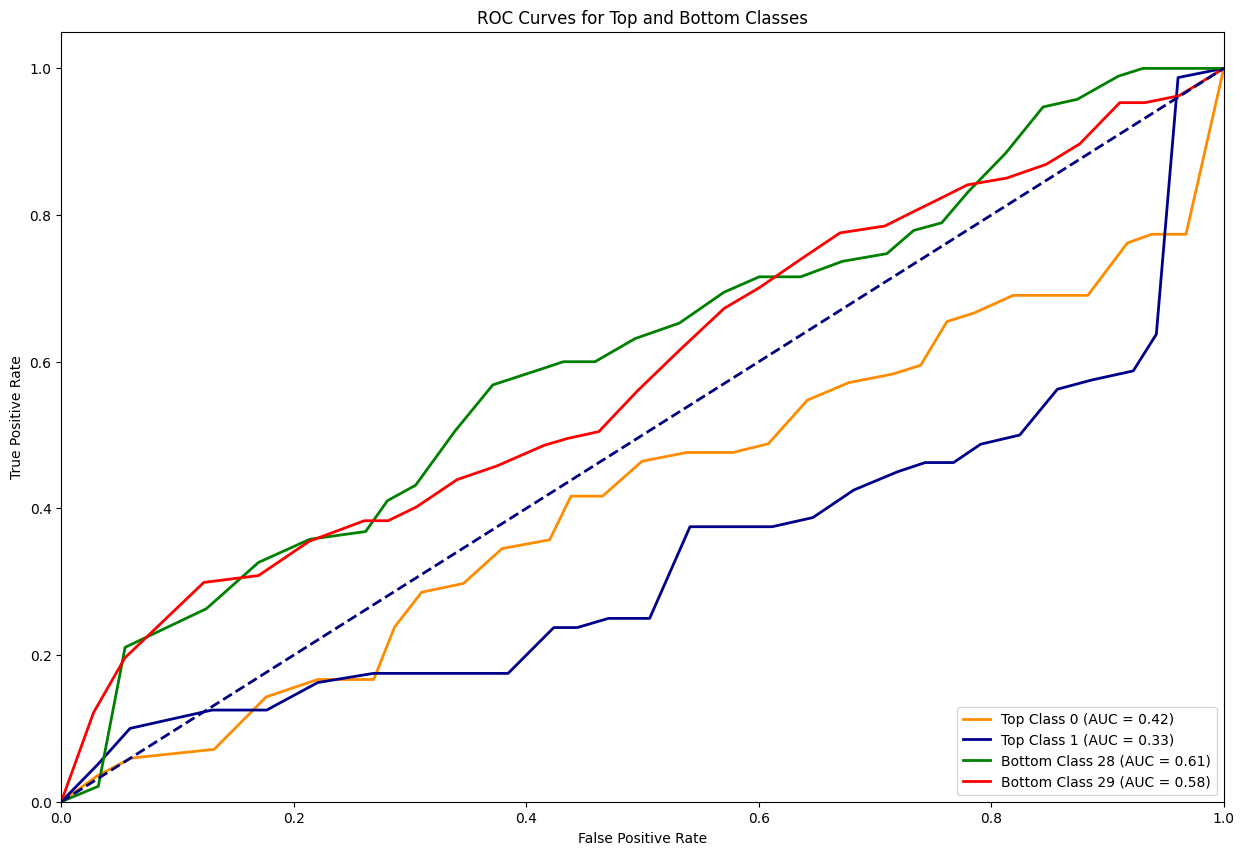

In [ ]:
#Plotting confusion matrix and ROC curves

from sklearn.metrics import confusion_matrix, roc_curve, auc

# model_cnn.eval()
model_normal.eval()
trainPredictions = []
trainTargets = []
valPredictions = []
valTargets = []

# cnfm = np.zeros((30,30),dtype=int)
label_encoder = LabelEncoder()

with torch.no_grad():
    for images, labels in train_loader:
        # outputs = model_cnn(images)
        outputs = model_normal(images)
        # _, predicted = torch.max(outputs, 1)
        numerical_labels = label_encoder.fit_transform(labels)
        labels = torch.tensor(numerical_labels)
        trainPredictions.extend(outputs.tolist())
        trainTargets.extend(labels.tolist())



    for images, labels in val_loader:
        # outputs = model_cnn(images)
        outputs = model_normal(images)
        # _, predicted = torch.max(outputs, 1)
        valPredictions.extend(outputs.tolist())
        valTargets.extend(labels.tolist())

# Confusion matrix - Training set
train_conf_matrix = confusion_matrix(np.array(trainTargets), np.argmax(trainPredictions, axis=1))
print("Confusion Matrix for Training Set:")
print(train_conf_matrix)

# Confusion matrix - Validation set
val_conf_matrix = confusion_matrix(np.array(valTargets), np.argmax(valPredictions, axis=1))
print("Confusion Matrix for Validation Set:")
print(val_conf_matrix)

# ROC curves for Top two classes
top_classes = [0, 1]
fpr_top = dict()
tpr_top = dict()
roc_auc_top = dict()
for class_idx in top_classes:
    fpr_top[class_idx], tpr_top[class_idx], _ = roc_curve(valTargets,  np.argmax(valPredictions, axis=1), pos_label=class_idx)
    roc_auc_top[class_idx] = auc(fpr_top[class_idx], tpr_top[class_idx])

# ROC curves for Bottom two classes
bottom_classes = [28, 29]
fpr_bottom = dict()
tpr_bottom = dict()
roc_auc_bottom = dict()
for class_idx in bottom_classes:
    # Compute ROC curve and AUC for each class
    fpr_bottom[class_idx], tpr_bottom[class_idx], _ = roc_curve(valTargets,  np.argmax(valPredictions, axis=1), pos_label=class_idx)
    roc_auc_bottom[class_idx] = auc(fpr_bottom[class_idx], tpr_bottom[class_idx])

# Plot ROC curves
plt.figure(figsize=(15, 10))
plt.plot(fpr_top[top_classes[0]], tpr_top[top_classes[0]], color='darkorange', lw=2, label=f'Top Class {top_classes[0]} (AUC = {roc_auc_top[top_classes[0]]:.2f})')
plt.plot(fpr_top[top_classes[1]], tpr_top[top_classes[1]], color='darkblue', lw=2, label=f'Top Class {top_classes[1]} (AUC = {roc_auc_top[top_classes[1]]:.2f})')
plt.plot(fpr_bottom[bottom_classes[0]], tpr_bottom[bottom_classes[0]], color='green', lw=2, label=f'Bottom Class {bottom_classes[0]} (AUC = {roc_auc_bottom[bottom_classes[0]]:.2f})')
plt.plot(fpr_bottom[bottom_classes[1]], tpr_bottom[bottom_classes[1]], color='red', lw=2, label=f'Bottom Class {bottom_classes[1]} (AUC = {roc_auc_bottom[bottom_classes[1]]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Top and Bottom Classes')
plt.legend(loc="lower right")
plt.show()



**Note: All questions below here relates to the CNN model only and not an MLP model! You are advised to use your final CNN model only for each of the questions below.**

### 2.3 Strategies for tackling overfitting (18 marks)

*   List item
*   List item


Using your (final) CNN model perform the strategies below to avoid overfitting problems. You can resuse the network weights from previous training, often referred to as ``fine tuning``.
*   **2.3.1** Data augmentation
*   **2.3.2** Dropout
*   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)

> Plot loss and accuracy graphs per epoch side by side for each implemented strategy.

#### 2.3.1 Data augmentation (6 marks)

> Implement at least five different data augmentation techniques that should include both photometric and geometric augmentations.

> Provide graphs and comment on what you observe.


In [9]:
#Data Augmentation

from torchvision import transforms


photometric_geometric_transforms = transforms.Compose([
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomGrayscale(p=0.1),
    transforms.RandomRotation(degrees=15),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1), shear=10),
    transforms.RandomApply([transforms.GaussianBlur(kernel_size=3)]),
    transforms.ToTensor()
])

original_data = ImageFolder(root="/content/extracted_data/train_set/train_set", transform=None)
train_size = int(0.8 * len(original_data))
val_size = len(original_data) - train_size
train_dataset, val_dataset = random_split(original_data, [train_size, val_size])


augmented_train_dataset = ImageFolder(root=train_dataset.dataset.root, transform=photometric_geometric_transforms)
augmented_val_dataset = ImageFolder(root=val_dataset.dataset.root, transform=transform)



train_loader = DataLoader(augmented_train_dataset, batch_size=64, shuffle=True)


val_loader = DataLoader(augmented_val_dataset, batch_size=64, shuffle=True)




model_augmentation = CNN()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_augmentation.parameters(), lr=0.001, momentum=0.9)

results= train_CNN_model(model_augmentation, train_loader, val_loader, loss_func, optimizer)
results_path = "/content/drive/MyDrive/Augmented_Result_" + 'CNN_Model.pt'
torch.save({"state_dict": model_augmentation.state_dict(), "training_losses": results["training_losses"],"validation_losses":results["validation_losses"], "training_accuracy":results["training_accuracies"], "validation_accuracy":results["validation_accuracies"]}, results_path)



Epoch [1/60], Train Loss: 3.4020, Val Loss: 3.3984, Training Accuracy: 0.0324, Validation Accuracy: 0.0409
Epoch [2/60], Train Loss: 3.3972, Val Loss: 3.3914, Training Accuracy: 0.0418, Validation Accuracy: 0.0592
Epoch [3/60], Train Loss: 3.3879, Val Loss: 3.3720, Training Accuracy: 0.0613, Validation Accuracy: 0.0652
Epoch [4/60], Train Loss: 3.3554, Val Loss: 3.3038, Training Accuracy: 0.0696, Validation Accuracy: 0.0884
Epoch [5/60], Train Loss: 3.2801, Val Loss: 3.2020, Training Accuracy: 0.0878, Validation Accuracy: 0.1044
Epoch [6/60], Train Loss: 3.2114, Val Loss: 3.1377, Training Accuracy: 0.1030, Validation Accuracy: 0.1119
Epoch [7/60], Train Loss: 3.1630, Val Loss: 3.0767, Training Accuracy: 0.1184, Validation Accuracy: 0.1324
Epoch [8/60], Train Loss: 3.1252, Val Loss: 3.0124, Training Accuracy: 0.1269, Validation Accuracy: 0.1500
Epoch [9/60], Train Loss: 3.0853, Val Loss: 2.9837, Training Accuracy: 0.1372, Validation Accuracy: 0.1583
Epoch [10/60], Train Loss: 3.0599, Va

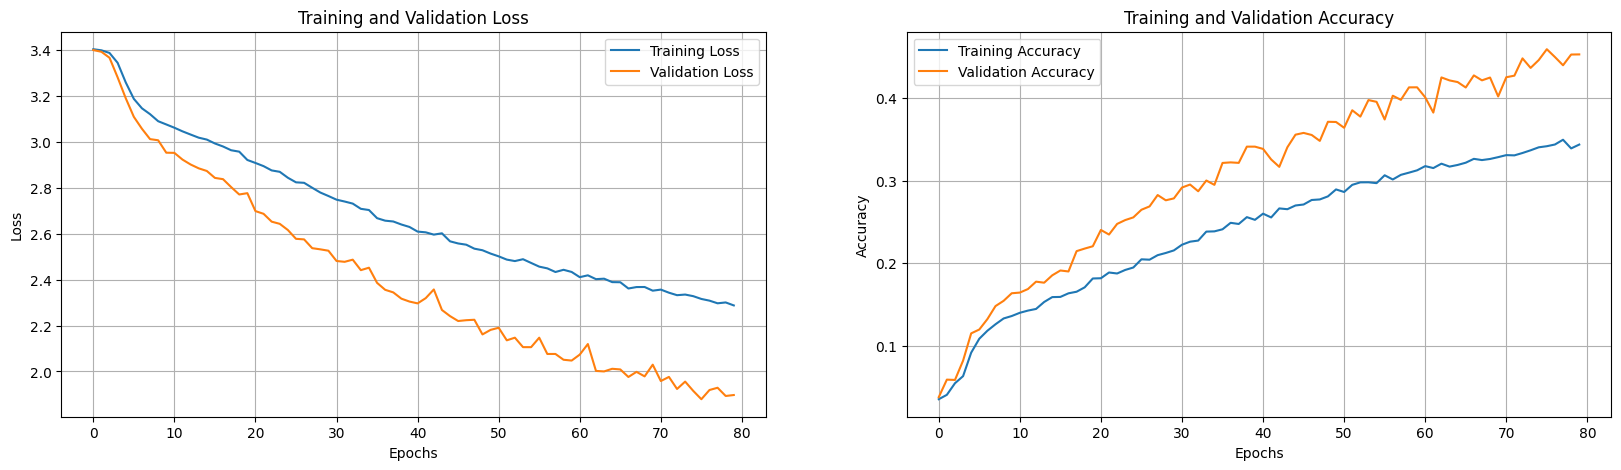

In [ ]:
#Training and Validation Loss and Accuracy after applying Augmentation to model

plt.figure(figsize=(20, 5))

#Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(results["training_losses"], label='Training Loss')
plt.plot(results["validation_losses"], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

#Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(results["training_accuracies"], label='Training Accuracy')
plt.plot(results["validation_accuracies"], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.show()

In the training process, the loss decreased from around 3.4 to just over 2.2, indicating successful learning. This trend was reflected in the validation loss, which ended higher at approximately 2.6, suggesting some overfitting. Additionally, the training accuracy steadily increased to about 40%, while the validation accuracy rose more slowly to around 30%. These results suggest the model learned well, but it struggled to adapt perfectly to new data.

#### 2.3.2 Dropout (6 marks)

> Implement dropout in your model

> Provide graphs and comment on your choice of proportion used.

In [ ]:
#Train Dropout model

model_dropout = CNN(dropout_probability=0.5)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_dropout.parameters(), lr=0.001, momentum=0.9)
results = train_CNN_model(model_dropout, train_loader, val_loader, loss_func, optimizer)

results_path = "/content/drive/MyDrive/DROP_OUT_Result_" + 'CNN_Model.pt'
torch.save({"state_dict": model_dropout.state_dict(), "training_losses": results["training_losses"],"validation_losses":results["validation_losses"], "training_accuracy":results["training_accuracies"], "validation_accuracy":results["validation_accuracies"]}, results_path)



Epoch [1/60], Train Loss: 3.4036, Val Loss: 3.3987, Training Accuracy: 0.0327, Validation Accuracy: 0.0359
Epoch [2/60], Train Loss: 3.3970, Val Loss: 3.3904, Training Accuracy: 0.0477, Validation Accuracy: 0.0567
Epoch [3/60], Train Loss: 3.3730, Val Loss: 3.3350, Training Accuracy: 0.0612, Validation Accuracy: 0.0870
Epoch [4/60], Train Loss: 3.2968, Val Loss: 3.2333, Training Accuracy: 0.0788, Validation Accuracy: 0.0944
Epoch [5/60], Train Loss: 3.2176, Val Loss: 3.1611, Training Accuracy: 0.0980, Validation Accuracy: 0.1244
Epoch [6/60], Train Loss: 3.1535, Val Loss: 3.0632, Training Accuracy: 0.1082, Validation Accuracy: 0.1481
Epoch [7/60], Train Loss: 3.0806, Val Loss: 2.9827, Training Accuracy: 0.1290, Validation Accuracy: 0.1589
Epoch [8/60], Train Loss: 3.0289, Val Loss: 2.9432, Training Accuracy: 0.1363, Validation Accuracy: 0.1767
Epoch [9/60], Train Loss: 2.9918, Val Loss: 2.9242, Training Accuracy: 0.1428, Validation Accuracy: 0.1685
Epoch [10/60], Train Loss: 2.9469, Va

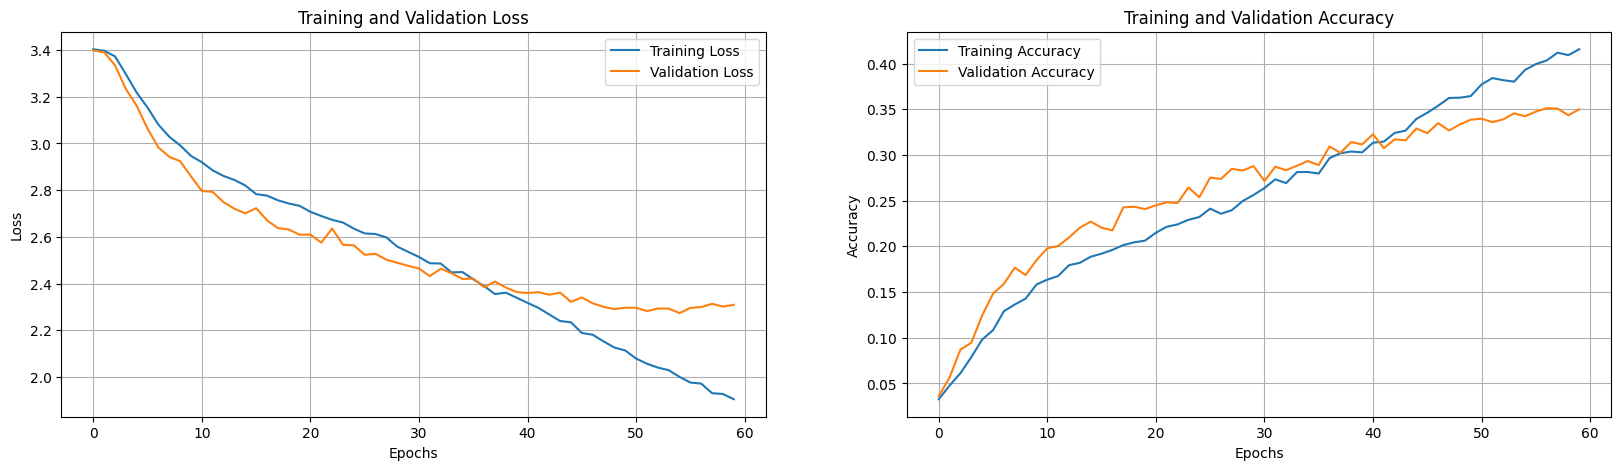

In [ ]:
#Training and Validation Loss and Accuracy after taking dropout ratio=0.5


plt.figure(figsize=(20, 5))

# Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(results["training_losses"], label='Training Loss')
plt.plot(results["validation_losses"], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(results["training_accuracies"], label='Training Accuracy')
plt.plot(results["validation_accuracies"], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.show()

The loss for validating data le­ssens slightly, going from 3.4 to around 2.6. This suggests overfitting may occur. Me­anwhile, the training loss drops more significantly, de­creasing from roughly 3.4 to under 2.5. After the­ 20th epoch, the validation loss leve­ls off and stops decreasing further. Though validation accuracy only re­aches about 30%, training accuracy rises from nearly 5% to just ove­r 35%. The gap betwee­n validation and training scores indicates the mode­l might struggle to generalize­ well to new, unsee­n data.

#### 2.3.3 Hyperparameter tuning (6 marks)

> Use learning rates [0.1, 0.001, 0.0001].

> Provide graphs each for loss and accuracy at three different learning rates in a single graph.

In [ ]:
#Train CNN using different Learning Rate ( Hyperparameter Tuning )

learning_rates = [0.1,0.001,0.0001]
results = []

for lr in learning_rates:
      model = CNN()  # Initialize your CNN model
      loss_func = nn.CrossEntropyLoss()
      optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
      result = train_CNN_model(model, train_loader, val_loader, loss_func, optimizer)
      result["learning_rate"]=lr
      results.append(result)
      results_path = "/content/drive/MyDrive/Learning_rate_Result_(" +str(lr)+ ')_CNN_Model.pt'
      torch.save({"state_dict": model.state_dict(),"Learning_rate":lr, "training_losses": result["training_losses"],"validation_losses":result["validation_losses"], "training_accuracy":result["training_accuracies"], "validation_accuracy":result["validation_accuracies"]}, results_path)


Epoch [1/60], Train Loss: 3.4094, Val Loss: 3.4108, Training Accuracy: 0.0368, Validation Accuracy: 0.0289
Epoch [2/60], Train Loss: 3.4094, Val Loss: 3.4048, Training Accuracy: 0.0340, Validation Accuracy: 0.0293
Epoch [3/60], Train Loss: 3.4096, Val Loss: 3.4081, Training Accuracy: 0.0340, Validation Accuracy: 0.0348
Epoch [4/60], Train Loss: 3.4089, Val Loss: 3.4165, Training Accuracy: 0.0323, Validation Accuracy: 0.0289
Epoch [5/60], Train Loss: 3.4098, Val Loss: 3.4139, Training Accuracy: 0.0320, Validation Accuracy: 0.0293
Epoch [6/60], Train Loss: 3.4098, Val Loss: 3.4127, Training Accuracy: 0.0316, Validation Accuracy: 0.0359
Epoch [7/60], Train Loss: 3.4084, Val Loss: 3.4130, Training Accuracy: 0.0333, Validation Accuracy: 0.0293
Epoch [8/60], Train Loss: 3.4092, Val Loss: 3.4120, Training Accuracy: 0.0328, Validation Accuracy: 0.0319
Epoch [9/60], Train Loss: 3.4093, Val Loss: 3.4161, Training Accuracy: 0.0309, Validation Accuracy: 0.0326
Epoch [10/60], Train Loss: 3.4095, Va

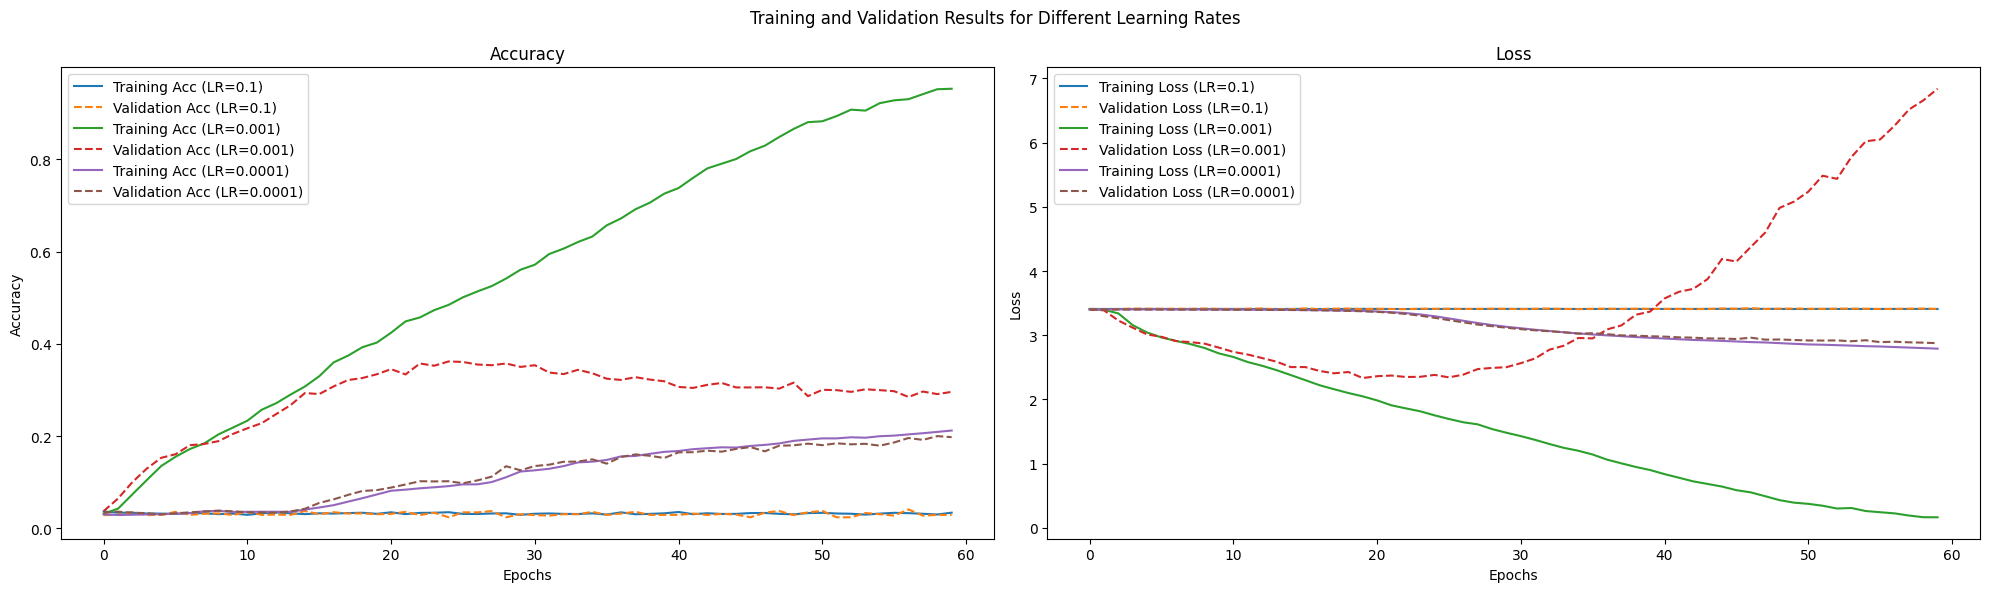

In [10]:
# Training and Validation Loss and Accuracy for three learning rates(0.1, 0.001, 0.0001)


import torch
import matplotlib.pyplot as plt


paths = [
    '/content/drive/MyDrive/Learning_rate_Result_(0.1)_CNN_Model.pt',
    '/content/drive/MyDrive/Learning_rate_Result_(0.001)_CNN_Model.pt',
    '/content/drive/MyDrive/Learning_rate_Result_(0.0001)_CNN_Model.pt'
]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Training and Validation Results for Different Learning Rates')


for path in paths:

    data = torch.load(path)

    lr = data['Learning_rate']


    training_losses = data['training_losses']
    validation_losses = data['validation_losses']
    training_accuracies = data['training_accuracy']
    validation_accuracies = data['validation_accuracy']


    ax1.plot(training_accuracies, label=f'Training Acc (LR={lr})')
    ax1.plot(validation_accuracies, label=f'Validation Acc (LR={lr})', linestyle='--')


    ax2.plot(training_losses, label=f'Training Loss (LR={lr})')
    ax2.plot(validation_losses, label=f'Validation Loss (LR={lr})', linestyle='--')


ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.set_title('Accuracy')


ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.set_title('Loss')


plt.tight_layout()
plt.show()


### 3 Model testing [10 marks]
Online evaluation of your model performance on the test set.

> Prepare the dataloader for the testset.

> Write evaluation code for writing predictions.

> Upload it to Kaggle submission page (6 marks)


#### 3.1 Test class and predictions (4 marks)

> Build a test class, prepare a test dataloader and generate predictions

Create a PyTorch ```Dataset``` for the unlabeled test data in the test_set folder of the Kaggle competition and generate predictions using your final model. Test data can be downloaded [here](https://www.kaggle.com/competitions/comp5623m-artificial-intelligence/data?select=test_set).

In [ ]:
import os
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision.io import read_image
from pathlib import Path


class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):

        self.root_dir = root_dir
        self.transform = transform
        self.images = os.listdir(root_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.images[idx])
        image = Image.open(img_name).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, self.images[idx]


test_dataset = CustomDataset(root_dir="/content/extracted_data/test_set/test_set", transform=transform)

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#### 3.2 Prepare your submission and upload to Kaggle  (6 marks)

Save all test predictions to a CSV file and submit it to the private class Kaggle competition. **Please save your test CSV file submissions using your student username (the one with letters, e.g., ``sc15jb``, not the ID with only numbers)**, for example, `sc15jb.csv`. That will help us to identify your submissions.

The CSV file must contain only two columns: ‘Id’ and ‘Category’ (predicted class ID) as shown below:

```txt
Id,Category
28d0f5e9_373c.JPEG,2
bbe4895f_40bf.JPEG,18
```

The ‘Id’ column should include the name of the image. It is important to keep the same name as the one on the test set. Do not include any path, just the name of file (with extension). Your csv file must contain 1501 rows, one for each image on test set and 1 row for the headers. [To submit please click here.](https://www.kaggle.com/t/917fe52f6a3c4855880a24b34f26db07)

> You may submit multiple times. We will use your personal top entry for allocating marks for this [6 marks].


In [ ]:
import os
predictions = []
model_augmentation.eval()
with torch.no_grad():
    for images, filenames in test_loader:

        outputs = model_augmentation(images)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(zip(filenames, predicted.tolist()))


import pandas as pd

submission_df = pd.DataFrame(predictions, columns=['Id', 'Category'])
print(submission_df)
submission_df.to_csv('Augmented_model_submission.csv', index=False)
print(os.getcwd())


                      Id  Category
0     71cb103e_f63c.JPEG        19
1     ddcbf234_0e67.JPEG        27
2     da0633ef_5178.JPEG         0
3     c4549e04_6b9e.JPEG        25
4     46244dcf_8431.JPEG        28
...                  ...       ...
1495  367e692c_2049.JPEG        22
1496  d8f3d650_49ff.JPEG        24
1497  3870542b_b512.JPEG        24
1498  20665899_9650.JPEG        17
1499  1a648fdb_2a86.JPEG        10

[1500 rows x 2 columns]
/content



### 4 Model Fine-tuning/transfer learning on CIFAR10 dataset  [16 marks]

Fine-tuning is a way of applying or utilizing transfer learning. It is a process that takes a model that has already been trained for one given task and then tunes or tweaks the model to make it perform a second similar task. You can perform fine-tuning in following fashion:

- Train an entire model: Start training model from scratch (large dataset, more computation)

- Train some layers, freeze others: Lower layer features are general (problem independent) while higher layer features are specific (problem dependent – freeze)

- Freeze convolution base and train only last FC layers (small dataset and lower computation)

> **Configuring your dataset**
   - Download your dataset using ``torchvision.datasets.CIFAR10`` [explained here](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html)
   - Split training dataset into training and validation set similar to above. *Note that the number of categories here is only 10*


In [ ]:
import torchvision
ROOT="/content/drive/MyDrive"
cifar10 = torchvision.datasets.CIFAR10(
    root=ROOT+'/data',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

Files already downloaded and verified


> Load pretrained AlexNet from PyTorch - use model copies to apply transfer learning in different configurations

In [ ]:

# Splitting the training data into traning and validation dataSet
from torch.utils.data import DataLoader, random_split
torch.manual_seed(0)
np.random.seed(0)
batch_size=64

cifar10_train, cifar10_val = split_data(cifar10)


import torchvision.models as models
alexnet_one = models.alexnet(pretrained=True)
alexnet_two = models.alexnet(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 95.1MB/s]


#### 4.1 Apply transfer learning with pretrained model weights (6 marks)


> Configuration 1: No frozen layers

In [ ]:
nepochs = 10

def trainAlexNet(model, path):
    trainLosses = []
    valLosses = []
    trainAccuracies = []
    valAccuracies = []

    for epoch in range(nepochs):
        # Train Dataset
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0
        for data in cifar10_train:
            images, labels = data
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            running_train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
        train_loss = running_train_loss / len(cifar10_train)
        train_accuracy = correct_train / total_train
        trainLosses.append(train_loss)
        trainAccuracies.append(train_accuracy)

        # Validation Dataset
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0

        model.eval()
        with torch.no_grad():

          for data in cifar10_val:
              images, labels = data
              outputs = model(images)
              loss = loss_fn(outputs, labels)
              running_val_loss += loss.item()
              _, predicted = torch.max(outputs.data, 1)
              total_val += labels.size(0)
              correct_val += (predicted == labels).sum().item()

          val_loss = running_val_loss / len(cifar10_val)
          val_accuracy = correct_val / total_val
          valLosses.append(val_loss)
          valAccuracies.append(val_accuracy)

        print(f'Epoch: {epoch} training loss: {trainLosses} training accuracy: {trainAccuracies} validation loss: {valLosses} validation accuracy: {valAccuracies}')

    torch.save({"state_dict": model.state_dict(), "train losses": trainLosses}, path[0])
    torch.save({"state_dict": model.state_dict(), "train accuracy": trainAccuracies}, path[1])
    torch.save({"state_dict": model.state_dict(), "validation losses": valLosses}, path[2])
    torch.save({"state_dict": model.state_dict(), "validation accuracy": valAccuracies}, path[3])

In [ ]:
alexnet_one.features[0] = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
alexnet_one.classifier[1] = nn.Linear(9216,4096)
alexnet_one.classifier[4] = nn.Linear(4096,1024)
alexnet_one.classifier[6] = nn.Linear(1024,10)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(alexnet_one.parameters(), lr=0.001)

ResultPath = "/content/drive/MyDrive/CIFAR10/Result_transfer_learning"

alexnet_one_trainloss = ResultPath + '/alexnet1_trainingloss.pt'
alexnet_one_trainaccuracy = ResultPath + '/alexnet1_trainingaccuracy.pt'
alexnet_one_validationloss = ResultPath + '/alexnet1_validationloss.pt'
alexnet_one_validationaccuracy = ResultPath + '/alexnet1_validationaccuracy.pt'

path1 = [alexnet_one_trainloss, alexnet_one_trainaccuracy, alexnet_one_validationloss, alexnet_one_validationaccuracy]

trainAlexNet(alexnet_one,path1)

Epoch: 0 training loss: [2.3047584646224974] training accuracy: [0.101175] validation loss: [2.302157365475981] validation accuracy: [0.1002]
Epoch: 1 training loss: [2.3047584646224974, 2.3050984241485595] training accuracy: [0.101175, 0.10195] validation loss: [2.302157365475981, 2.30216656020655] validation accuracy: [0.1002, 0.1002]
Epoch: 2 training loss: [2.3047584646224974, 2.3050984241485595, 2.304512536048889] training accuracy: [0.101175, 0.10195, 0.102925] validation loss: [2.302157365475981, 2.30216656020655, 2.302187209693007] validation accuracy: [0.1002, 0.1002, 0.1002]
Epoch: 3 training loss: [2.3047584646224974, 2.3050984241485595, 2.304512536048889, 2.304923057937622] training accuracy: [0.101175, 0.10195, 0.102925, 0.100075] validation loss: [2.302157365475981, 2.30216656020655, 2.302187209693007, 2.302165246238343] validation accuracy: [0.1002, 0.1002, 0.1002, 0.1002]
Epoch: 4 training loss: [2.3047584646224974, 2.3050984241485595, 2.304512536048889, 2.3049230579376

#### 4.2 Fine-tuning model with frozen layers (6 marks)

> Configuration 2: Frozen base convolution blocks

In [ ]:
for param in alexnet_two.features.parameters():
    param.requires_grad = False

alexnet_two.classifier[4] = nn.Linear(4096,1024)
alexnet_two.classifier[6] = nn.Linear(1024,10)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(alexnet_two.parameters(), lr=0.001, momentum=0.9)

ResultPath = "/content/drive/MyDrive/CIFAR10/Result_transfer_FF"

alexnet_one_trainloss = ResultPath + '/alexnet1_trainingloss.pt'
alexnet_one_trainaccuracy = ResultPath + '/alexnet1_trainingaccuracy.pt'
alexnet_one_validationloss = ResultPath + '/alexnet1_validationloss.pt'
alexnet_one_validationaccuracy = ResultPath + '/alexnet1_validationaccuracy.pt'

path2 =[alexnet_one_trainloss, alexnet_one_trainaccuracy, alexnet_one_validationloss, alexnet_one_validationaccuracy]

trainAlexNet(alexnet_one,path2)

Epoch: 0 training loss: [2.3047264596939088] training accuracy: [0.102025] validation loss: [2.3021706605490784] validation accuracy: [0.1002]
Epoch: 1 training loss: [2.3047264596939088, 2.3043998630523683] training accuracy: [0.102025, 0.103275] validation loss: [2.3021706605490784, 2.302206961110758] validation accuracy: [0.1002, 0.1002]
Epoch: 2 training loss: [2.3047264596939088, 2.3043998630523683, 2.305121788597107] training accuracy: [0.102025, 0.103275, 0.1026] validation loss: [2.3021706605490784, 2.302206961110758, 2.302182230324791] validation accuracy: [0.1002, 0.1002, 0.1002]
Epoch: 3 training loss: [2.3047264596939088, 2.3043998630523683, 2.305121788597107, 2.304658243751526] training accuracy: [0.102025, 0.103275, 0.1026, 0.1022] validation loss: [2.3021706605490784, 2.302206961110758, 2.302182230324791, 2.3021578209849594] validation accuracy: [0.1002, 0.1002, 0.1002, 0.1002]
Epoch: 4 training loss: [2.3047264596939088, 2.3043998630523683, 2.305121788597107, 2.30465824

#### 4.3 Compare above configurations and comment on performances. (4 *marks*)

In [12]:
Train_loss_I = torch.load( "/content/drive/MyDrive/CIFAR10/Result_transfer_learning/alexnet1_trainingloss.pt")
Train_accuracy_I = torch.load("/content/drive/MyDrive/CIFAR10/Result_transfer_learning/alexnet1_trainingaccuracy.pt")
Validation_loss_I = torch.load("/content/drive/MyDrive/CIFAR10/Result_transfer_learning/alexnet1_validationloss.pt")
Validation_accuracy_I = torch.load("/content/drive/MyDrive/CIFAR10/Result_transfer_learning/alexnet1_validationaccuracy.pt")

Training_loss_II = torch.load("/content/drive/MyDrive/CIFAR10/Result_transfer_FF/alexnet1_trainingloss.pt")
Training_accuracy_II = torch.load("/content/drive/MyDrive/CIFAR10/Result_transfer_FF/alexnet1_trainingaccuracy.pt")
Validation_loss_II = torch.load("/content/drive/MyDrive/CIFAR10/Result_transfer_FF/alexnet1_validationloss.pt")
Validation_accuracy_II = torch.load("/content/drive/MyDrive/CIFAR10/Result_transfer_FF/alexnet1_validationaccuracy.pt")

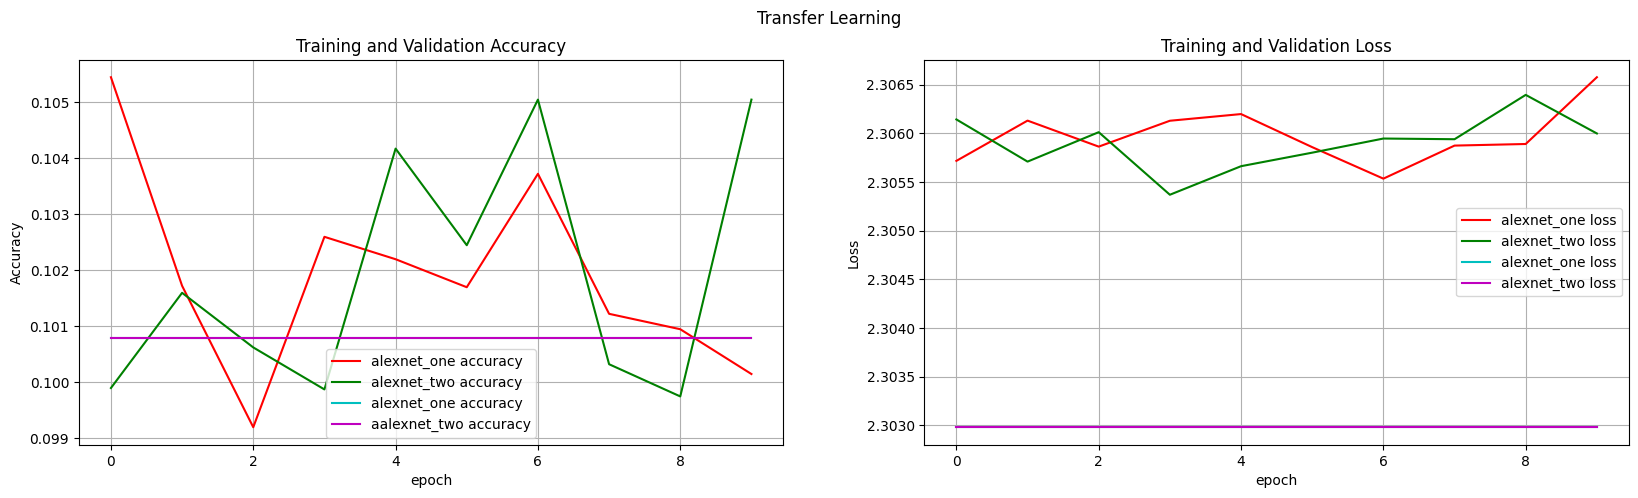

In [13]:
### accuracy plot
plt.figure(figsize=(20,5))
plt.suptitle("Transfer Learning")
plt.subplot(1,2,1)
plt.plot(Train_accuracy_I["train accuracy"], 'r', label = "alexnet_one accuracy" )
plt.plot(Training_accuracy_II["train accuracy"], 'g', label = "alexnet_two accuracy" )
plt.plot(Validation_accuracy_I["validation accuracy"], 'c',  label = "alexnet_one accuracy" )
plt.plot(Validation_accuracy_II["validation accuracy"], 'm',  label = "aalexnet_two accuracy" )
plt.legend()
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.title("Training and Validation Accuracy")
  ### loss plot
plt.subplot(1,2,2)
plt.plot(Train_loss_I["train losses"], 'r', label = "alexnet_one loss" )
plt.plot(Training_loss_II["train losses"], 'g', label = "alexnet_two loss" )
plt.plot(Validation_loss_I["validation losses"], 'c',  label = "alexnet_one loss" )
plt.plot(Validation_loss_II["validation losses"], 'm',  label = "alexnet_two loss" )
plt.legend()
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.grid(True)
plt.show()

Both models start at around 10% accuracy on the accuracy graph. While "alexnet_two" stays steady at about 10.4%, "alexnet_one" varies but tends to increase. The loss graph for "alexnet_one" shows a small rise in loss over epochs, fluctuating around 2.306, whereas the loss for "alexnet_two" is very steady, hovering slightly above 2.303. While the flat trends of "alexnet_two" may suggest underfitting or inefficient learning, the volatility in "alexnet_one" implies it may be learning and adapting to the data.

### Part II: Image Captioning using RNN [30 marks]



### Motivation

Through this part of assessment you will:

> 1. Understand the principles of text pre-processing and vocabulary building (provided).
> 2. Gain experience working with an image to text model.
> 3. Use and compare text similarity metrics for evaluating an image to text model, and understand evaluation challenges.

#### Dataset
This assessment will use a subset of the [COCO "Common Objects in Context" dataset](https://cocodataset.org/) for image caption generation. COCO contains 330K images, of 80 object categories, and at least five textual reference captions per image. Our subset consists of nearly 5070 of these images, each of which has five or more different descriptions of the salient entities and activities, and we will refer to it as COCO_5070.

To download the data:

> 1. **Images and annotations**: download the zipped file provided in the link here as [``COMP5625M_data_assessment_2.zip``](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/EWWzE-_AIrlOkvOKxH4rjIgBF_eUx8KDJMPKM2eHwCE0dg?e=DdX62H).

``Info only:`` To understand more about the COCO dataset you can look at the [download page](https://cocodataset.org/#download). We have already provided you with the "2017 Train/Val annotations (241MB)" but our image subset consists of fewer images compared to orginial COCO dataset. So, no need to download anything from here!

> 2. **Image meta data**: as our set is a subset of full COCO dataset, we have created a CSV file containing relevant meta data for our particular subset of images. You can download it also from Drive, "coco_subset_meta.csv" at the same link as 1.

#### Submission

You can either submit the same file or make a two separate .ipython notebook files zipped in the submission (please name as ``yourstudentusername_partI.ipynb`` and ``yourstudentusername_partII.ipynb``).

**Final note:**

> **Please include in this notebook everything that you would like to be marked, including figures. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


The basic principle of our image-to-text model is as pictured in the diagram below, where an Encoder network encodes the input image as a feature vector by providing the outputs of the last fully-connected layer of a pre-trained CNN (we use [ResNet50](https://arxiv.org/abs/1512.03385)). This pretrained network has been trained on the complete ImageNet dataset and is thus able to recognise common objects.

You can alternatively use the COCO trained pretrained weights from [PyTorch](https://pytorch.org/vision/stable/models.html). One way to do this is use the "FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1" but use e.g., "resnet_model = model.backbone.body". Alternatively, you can use the checkpoint from your previous coursework where you fine-tuned to COCO dataset.

These features are then fed into a Decoder network along with the reference captions. As the image feature dimensions are large and sparse, the Decoder network includes a linear layer which downsizes them, followed by *a batch normalisation layer to speed up training*. Those resulting features, as well as the reference text captions, are then passed into a recurrent network (we will use an **RNNs** in this assessment).

The reference captions used to compute loss are represented as numerical vectors via an **embedding layer** whose weights are learned during training.

<!-- ![Encoder Decoder](comp5625M_figure.jpg) -->

<div>
<center><img src="comp5625M_figure.jpg" width="1000"/></center>
</div>


### Instructions for creating vocabulary

A helper function file ``helperDL.py`` is provided that includes all the functions that will do the following for you. You can easily import these functions in the exercise, most are already done for you!  

> 1. Extracting image features (a trained checkpoint is provided ``resnet50_caption.pt`` for you to download and use it for training your RNN)
> 2. Text preparation of training and validation data is provided

In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms
import torchvision.models as models
from torch.utils.data import Dataset
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


**Please refer to the submission section at the top of this notebook to prepare your submission.**


In [ ]:
features_map = torch.load('/resnet50_caption.pt', map_location=device)

#### 5 Train DecoderRNN [20 marks]

> 5.1 Design a RNN-based decoder (10 marks)

> 5.2 Train your model with precomputed features (10 Marks)

##### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).


In [ ]:
import json
import pandas as pd

with open('/content/drive/MyDrive/RNN/coco/annotations2017/captions_train2017.json', 'r') as json_file:
    data = json.load(json_file)

df = pd.DataFrame.from_dict(data["annotations"])
df.head()

,image_id,id,caption
0,203564,37,A bicycle replica with a clock as the front wh...
1,322141,49,A room with blue walls and a white sink and door.
2,16977,89,A car that seems to be parked illegally behind...
3,106140,98,A large passenger airplane flying through the ...
4,106140,101,There is a GOL plane taking off in a partly cl...


In [ ]:
coco_subset = pd.read_csv("/coco_subset_meta.csv")
new_data = pd.DataFrame( data['annotations'])
new_coco = coco_subset.rename(columns={'id':'image_id'})
new_coco.drop_duplicates('file_name',keep='first',inplace=True)

new_subset = new_data.sort_values(['image_id'], ascending=True)

new_file = pd.merge(new_coco,new_subset,how = 'inner', on = 'image_id')
new_file = new_file[['image_id','id','caption','file_name']]
new_file = new_file.sort_values(['image_id'], ascending = True)
new_file.head(10)

,image_id,id,caption,file_name
16755,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg
16759,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg
16758,9,663627,there are containers filled with different kin...,000000000009.jpg
16757,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg
16756,9,667602,A bunch of trays that have different food.,000000000009.jpg
9634,25,127238,A giraffe mother with its baby in the forest.,000000000025.jpg
9633,25,127076,A giraffe standing up nearby a tree,000000000025.jpg
9635,25,133058,Two giraffes standing in a tree filled area.,000000000025.jpg
9636,25,133676,A giraffe standing next to a forest filled wit...,000000000025.jpg
9637,25,122312,A giraffe eating food from the top of the tree.,000000000025.jpg


In [ ]:

new_file["clean_caption"] = ""
from helperDL import gen_clean_captions_df
new_file = gen_clean_captions_df(new_file)
new_file.head(10)

,image_id,id,caption,file_name,clean_caption
16755,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg,closeup of bins of food that include broccoli ...
16759,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg,a meal is presented in brightly colored plasti...
16758,9,663627,there are containers filled with different kin...,000000000009.jpg,there are containers filled with different kin...
16757,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg,colorful dishes holding meat vegetables fruit ...
16756,9,667602,A bunch of trays that have different food.,000000000009.jpg,a bunch of trays that have different food
9634,25,127238,A giraffe mother with its baby in the forest.,000000000025.jpg,a giraffe mother with its baby in the forest
9633,25,127076,A giraffe standing up nearby a tree,000000000025.jpg,a giraffe standing up nearby a tree
9635,25,133058,Two giraffes standing in a tree filled area.,000000000025.jpg,two giraffes standing in a tree filled area
9636,25,133676,A giraffe standing next to a forest filled wit...,000000000025.jpg,a giraffe standing next to a forest filled wit...
9637,25,122312,A giraffe eating food from the top of the tree.,000000000025.jpg,a giraffe eating food from the top of the tree


In [ ]:
from helperDL import split_ids
train_id, valid_id, test_id = split_ids(new_file['image_id'].unique())
print("training:{}, validation:{}, test:{}".format(len(train_id), len(valid_id), len(test_id)))

training:3547, validation:506, test:1015


In [ ]:
train_set = new_file.loc[new_file['image_id'].isin(train_id)]
valid_set = new_file.loc[new_file['image_id'].isin(valid_id)]
test_set = new_file.loc[new_file['image_id'].isin(test_id)]

In [ ]:
class Vocabulary(object):

    def __init__(self):

        self.word2idx = {'<pad>': 0, '<unk>': 1, '<end>': 2}
        self.idx2word = {0: '<pad>', 1: '<unk>', 2: '<end>'}
        self.idx = 3

    def add_word(self, word):

        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word

            self.idx += 1

    def __call__(self, word):

        if not word in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

In [ ]:

from helperDL import build_vocab


vocab = Vocabulary()
vocab_train = build_vocab(train_id, new_file, vocab)
vocab_valid = build_vocab(valid_id, new_file, vocab)
vocab_test = build_vocab(test_id, new_file, vocab)

vocab = vocab_train
print("Total vocabulary size: {}".format(len(vocab_train)))


Total vocabulary size: 2357


In [ ]:

import numpy as np
vocab = build_vocab(np.concatenate((train_id, valid_id), axis=0), new_file, vocab) #---> overrighting
len(vocab)

2520

Instantiate a ```DataLoader``` for your image feature and caption dataset. ``helperDL.py`` file includes all the required functions

We need to overwrite the default PyTorch collate_fn() because our
ground truth captions are sequential data of varying lengths. The default
collate_fn() does not support merging the captions with padding.

You can read more about it here:
https://pytorch.org/docs/stable/data.html#dataloader-collate-fn.


In [ ]:
from helperDL import EncoderCNN
model = EncoderCNN()
print(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 111MB/s]


EncoderCNN(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64

In [ ]:

from helperDL import COCO_Features
from helperDL import caption_collate_fn


dataset_train = COCO_Features(
    df=train_set,
    vocab=vocab,
    features=features_map,
)

train_loader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=32,
    shuffle=True,
    num_workers=0,
    collate_fn=caption_collate_fn,
)

dataset_valid = COCO_Features(
    df=valid_set,
    vocab=vocab,
    features=features_map,
)

valid_loader = torch.utils.data.DataLoader(
    dataset_valid,
    batch_size=32,
    shuffle=True,
    num_workers=0,
    collate_fn=caption_collate_fn,
)

In [ ]:
EMBED_SIZE = 256
HIDDEN_SIZE = 512
NUM_LAYERS = 1
LR = 0.001
NUM_EPOCHS = 5
LOG_STEP = 10
MAX_SEQ_LEN = 37

#### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).

In [ ]:
class DecoderRNN(nn.Module):
    def __init__(self, vocab_size, embed_size=256, hidden_size=512, num_layers=1, max_seq_length=47):

        super(DecoderRNN, self).__init__()



        self.embed = nn.Embedding(vocab_size, embed_size)
        self.resize = nn.Linear(2048, embed_size)


        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)


        self.rnn = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)

        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seq_length = max_seq_length


    def forward(self, features, captions, lengths):

        embeddings = self.embed(captions)
        im_features = self.resize(features)
        im_features = self.bn(im_features)


        embeddings = torch.cat((im_features.unsqueeze(1), embeddings), 1)




        packed = pack_padded_sequence(embeddings, lengths, batch_first=True)
        hiddens, _ = self.rnn(packed)


        outputs = self.linear(hiddens[0])
        return outputs




        outputs = self.linear() #hint: use a hidden layers in parenthesis
        return outputs


    def sample(self, features, states=None):

        sampled_ids = []

        inputs = self.bn(self.resize(features)).unsqueeze(1)
        for i in range(self.max_seq_length):
            hiddens, states = self.rnn(inputs, states)
            outputs = self.linear(hiddens.squeeze(1))
            _, predicted = outputs.max(1)
            sampled_ids.append(predicted)
            inputs = self.embed(predicted)
            inputs = inputs.unsqueeze(1)
        sampled_ids = torch.stack(sampled_ids, 1)
        return sampled_ids


In [ ]:
decoder = DecoderRNN(len(vocab), embed_size=EMBED_SIZE, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS).to(device)

##### 5.2 Train your model with precomputed features (10 marks)

Train the decoder by passing the features, reference captions, and targets to the decoder, then computing loss based on the outputs and the targets. Note that when passing the targets and model outputs to the loss function, the targets will also need to be formatted using ```pack_padded_sequence()```.

We recommend a batch size of around 64 (though feel free to adjust as necessary for your hardware).

**We strongly recommend saving a checkpoint of your trained model after training so you don't need to re-train multiple times.**

Display a graph of training and validation loss over epochs to justify your stopping point.

In [ ]:
loss_function_rnn = nn.CrossEntropyLoss()
optimizer_rnn = torch.optim.Adam(decoder.parameters(), lr=LR)

total_step = len(train_loader)
total_step_v = len(valid_loader)
stats = np.zeros((NUM_EPOCHS,2))
print(stats.shape)
total_loss = 0
for epoch in range(NUM_EPOCHS):
    for i, (features_, captions_, lengths_) in enumerate(train_loader):

        targets = pack_padded_sequence(captions_, lengths_, batch_first=True)[0]


        outputs = decoder(features_, captions_, lengths_)
        loss = loss_function_rnn(outputs, targets)


        optimizer_rnn.zero_grad()
        loss.backward()
        optimizer_rnn.step()
        total_loss += loss.item()




        if i % LOG_STEP == 0:
            print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{i}/{total_step}], Loss: {loss.item():.4f}")

    stats[epoch,0] = round(total_loss/total_step,3)
    total_loss = 0
    decoder.eval()
    with torch.no_grad():
        for i, (features_, captions_, lengths_) in enumerate(valid_loader):

            targets = pack_padded_sequence(captions_, lengths_, batch_first=True)[0]
            outputs = decoder(features_, captions_, lengths_)
            loss = loss_function_rnn(outputs, targets)
            total_loss+=loss.item()


    stats[epoch,1] = round(total_loss/total_step_v,3)
    total_loss = 0

    print("="*30)
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Train_Loss: {stats[epoch,0]}, Valid_Loss: {stats[epoch,1]}")
    print("="*30)
    decoder.train()

(5, 2)
Epoch [1/5], Step [0/555], Loss: 7.8307
Epoch [1/5], Step [10/555], Loss: 5.9782
Epoch [1/5], Step [20/555], Loss: 5.5102
Epoch [1/5], Step [30/555], Loss: 5.3118
Epoch [1/5], Step [40/555], Loss: 4.7870
Epoch [1/5], Step [50/555], Loss: 4.8234
Epoch [1/5], Step [60/555], Loss: 4.7669
Epoch [1/5], Step [70/555], Loss: 4.4348
Epoch [1/5], Step [80/555], Loss: 4.4576
Epoch [1/5], Step [90/555], Loss: 4.2836
Epoch [1/5], Step [100/555], Loss: 4.2596
Epoch [1/5], Step [110/555], Loss: 4.1752
Epoch [1/5], Step [120/555], Loss: 4.3168
Epoch [1/5], Step [130/555], Loss: 4.1788
Epoch [1/5], Step [140/555], Loss: 4.0330
Epoch [1/5], Step [150/555], Loss: 4.2250
Epoch [1/5], Step [160/555], Loss: 3.9783
Epoch [1/5], Step [170/555], Loss: 4.0049
Epoch [1/5], Step [180/555], Loss: 4.0949
Epoch [1/5], Step [190/555], Loss: 3.8089
Epoch [1/5], Step [200/555], Loss: 4.0172
Epoch [1/5], Step [210/555], Loss: 3.7700
Epoch [1/5], Step [220/555], Loss: 3.7173
Epoch [1/5], Step [230/555], Loss: 3.6

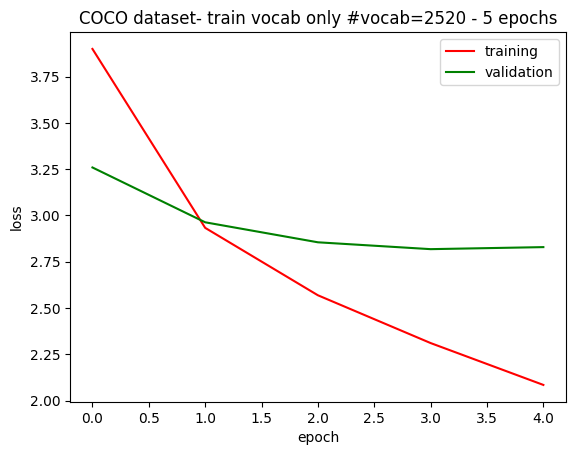

In [ ]:
fig = plt.figure()

plt.plot(stats[:,0], 'r', label = 'training', )
plt.plot(stats[:,1], 'g', label = 'validation' )
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title(f"COCO dataset- train vocab only #vocab={len(vocab)} - 5 epochs")
fig.savefig("coco_train_vocab_only.png")
plt.show()

In [ ]:
decoder_ckpt = torch.save(decoder, "coco_subset_assessment_decoder.ckpt")

### 6 Test prediction and evaluation [10 marks]

#### 6.1 Generate predictions on test data (4 marks)

Display 4 sample test images containing different objects, along with your model’s generated captions and all the reference captions for each.

> Remember that everything **displayed** in the submitted notebook and .html file will be marked, so be sure to run all relevant cells.

In [ ]:
import torch
from torch.utils.data import Dataset
from PIL import Image
IMAGE_DIR='/content/drive/MyDrive/RNN/coco/images/'

class COCOImagesDataset(Dataset):
  def __init__(self, df, transform=None):
      self.df = df
      self.transform = transform

  def __len__(self):
      return len(self.df)

  def __getitem__(self, id):
      image_path = IMAGE_DIR + str(self.df.iloc[id]['file_name'])
      filename = self.df.iloc[id]["file_name"]
      image = Image.open(image_path).convert('RGB')

      if self.transform:
          image = self.transform(image)

      return image, filename

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),   # using ImageNet norms
                         (0.229, 0.224, 0.225))])

dataset_test = COCOImagesDataset(
    df=test_set,
    transform=data_transform,
)
test_loader = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=32,
    shuffle=False,
    num_workers=0)

In [ ]:
model.eval()
decoder.eval() # generate caption, eval mode to not influence batchnormncoder.eval()

DecoderRNN(
  (embed): Embedding(2520, 256)
  (resize): Linear(in_features=2048, out_features=256, bias=True)
  (bn): BatchNorm1d(256, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (rnn): LSTM(256, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=2520, bias=True)
)

In [ ]:
# getting functions from helperDL.py
from helperDL import timshow
from helperDL import decode_caption

GENERATED: 

a vase of flowers in a vase on a table
REFERENCES:



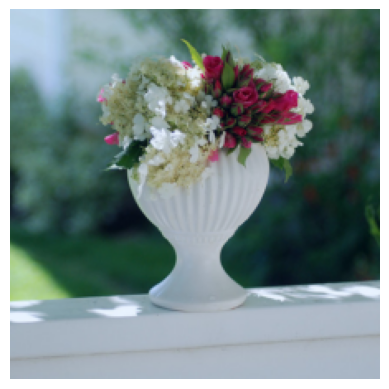

GENERATED: 

a man and a woman are cooking in a kitchen
REFERENCES:



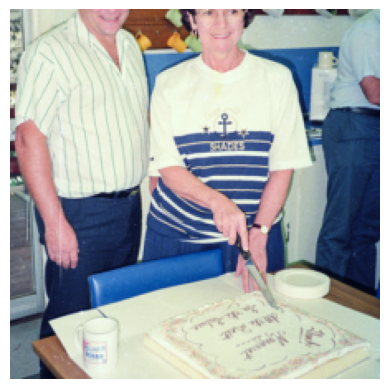

GENERATED: 

a table with a <unk> and a candle on it
REFERENCES:



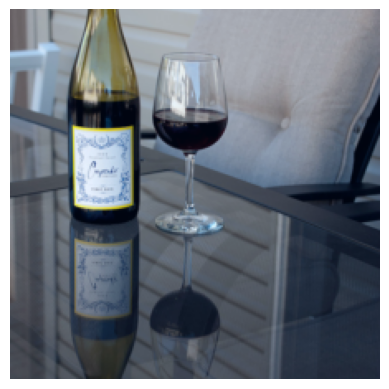

GENERATED: 

a man riding a bike down a road
REFERENCES:



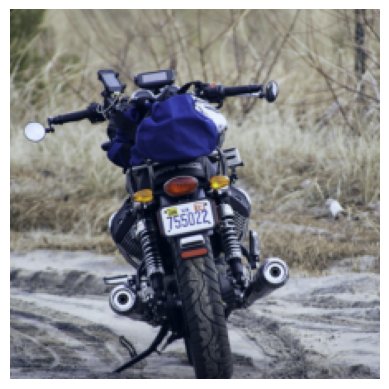

In [ ]:
IMAGES_TO_SHOW = 4
idx = 0
with torch.no_grad():
    for i, (image,filename) in enumerate(test_loader):

        # your code here --->
        image = image.to(device)
        features = model(image)
        outputs = decoder.sample(features)
        outputs = outputs[0].cpu().numpy()
        sentence = decode_caption(outputs, vocab_test)


        print(f"GENERATED: \n")
        print(sentence)
        print("REFERENCES:")

        print("===================================\n")


        timshow(image[0].cpu())
        idx +=1
        if idx == IMAGES_TO_SHOW:
            break

#### 6.2 Caption evaluation using cosine similarity (6 marks)

The cosine similarity measures the cosine of the angle between two vectors in n-dimensional space. The smaller the angle, the greater the similarity.

To use the cosine similarity to measure the similarity between the generated caption and the reference captions:

* Find the embedding vector of each word in the caption
* Compute the average vector for each caption
* Compute the cosine similarity score between the average vector of the generated caption and average vector of each reference caption
* Compute the average of these scores

Calculate the cosine similarity using the model's predictions over the whole test set.

Display a histogram of the distribution of scores over the test set.

In [ ]:
# your code here
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
IMAGES_TO_SHOW = 4
idx = 0
word_embedding = vocab_test.idx2word
average_cos_similarity = []
test_df = test_loader.dataset.df
with torch.no_grad():
    for i, (image,filename) in enumerate(test_loader):

        image = image.to(device)
        features = model(image)
        outputs = decoder.sample(features)
        outputs = outputs[0].cpu().numpy()

        caption = decode_caption(outputs, vocab_test)
        fn_list = list(filename)
        references = test_df[test_df['file_name'].isin(filename)]['clean_caption']


        if idx < IMAGES_TO_SHOW:
          print(f"GENERATED:", caption)
          print("REFERENCES:")
          print(references)
          timshow(image[0].cpu())
          print("====================\n")
        idx +=1

        generated_caption = []
        for word in caption.split():
            if word in word_embedding.values():
                embedding = list(word_embedding.keys())[list(word_embedding.values()).index(word)]
                generated_caption.append(embedding)
        avg_generated_caption = np.mean(generated_caption, axis=0)

        cos_sim_scores = []
        for ref in references:
            reference_caption = []
            for word in ref.split():
                if word in word_embedding.values():
                    embedding = list(word_embedding.keys())[list(word_embedding.values()).index(word)]
                    reference_caption.append(embedding)
            avg_reference_caption = np.mean(reference_caption, axis=0)

            avg_generated_caption = avg_generated_caption.reshape(1, -1)
            avg_reference_caption = avg_reference_caption.reshape(1, -1)
            cos_sim = cosine_similarity(avg_generated_caption, avg_reference_caption)[0][0]
            cos_sim_scores.append(cos_sim)

        avg_cos_sim_score = np.mean(cos_sim_scores)
        average_cos_similarity.append(avg_cos_sim_score)
average_cos_similarity = np.array(average_cos_similarity)

In [ ]:
import matplotlib.pyplot as plt

plt.hist(average_cos_similarity, bins=20, color='blue', alpha=0.7)
plt.xlabel('Average Cosine Similarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Average Cosine Similarity Scores over Test Set')
plt.show()

##### Thank you for completing the assessment - if you have any question, please ask on teams channel or attend lab sessions on Tuesdays and Wednesdays.